In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [230]:
data = pd.read_csv("../input/mall-customers-dataset/Mall_Customers.csv")

In [231]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [232]:
data.shape

(200, 5)

In [233]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [234]:
data = data.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)': 'Spending_Score'})

In [235]:
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)

**UNIVARIATE ANALYSIS, BIVARIATE ANALYSIS, MULTIVARIATE ANALYSIS**

In [236]:
data_Gender = data.loc[data['Gender']=='Female']

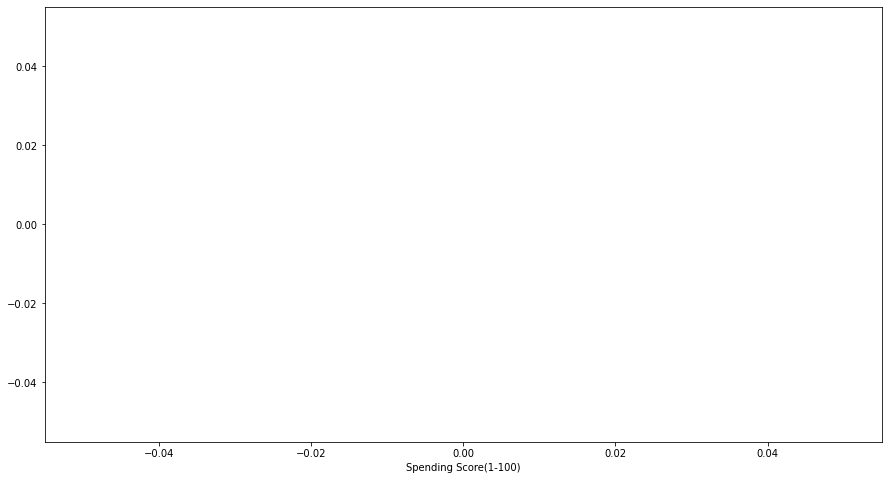

In [237]:
plt.plot(data_Gender['Age'], np.zeros_like(data_Gender['Age']))
plt.xlabel('Spending Score(1-100)')
plt.show()

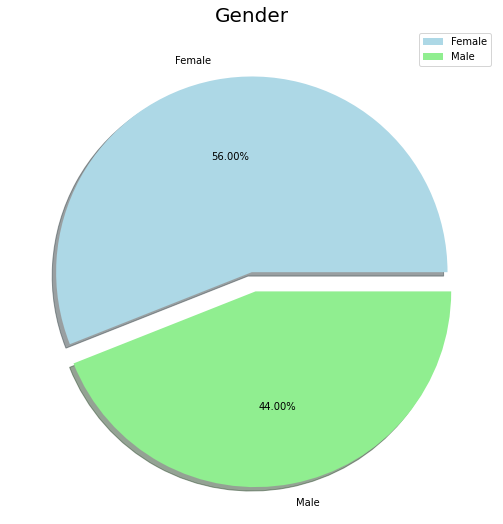

In [238]:
labels = ['Female','Male']
size = data['Gender'].value_counts()
colors = ['lightblue','lightgreen']
explode = [0,0.1]

plt.rcParams['figure.figsize']=(9,9)
plt.pie(size,colors=colors,explode=explode,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

In [239]:
data.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

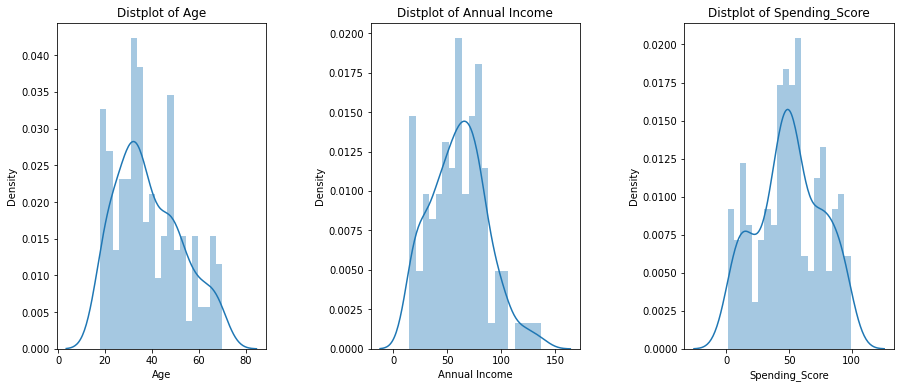

In [240]:
plt.figure(1, figsize = (15,6) )
n=0
for x in ['Age','Annual Income','Spending_Score']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

0    112
1     88
Name: Gender, dtype: int64

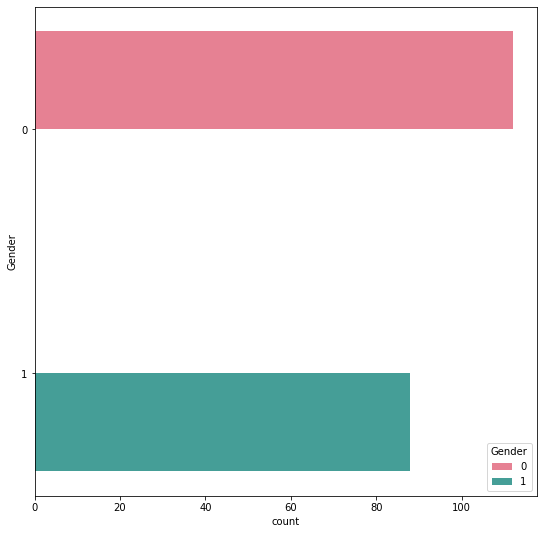

In [241]:
sns.countplot(y = 'Gender', data = data, palette="husl", hue = "Gender")
data["Gender"].value_counts()

In [242]:
###DISTRIBUTION OF AGE

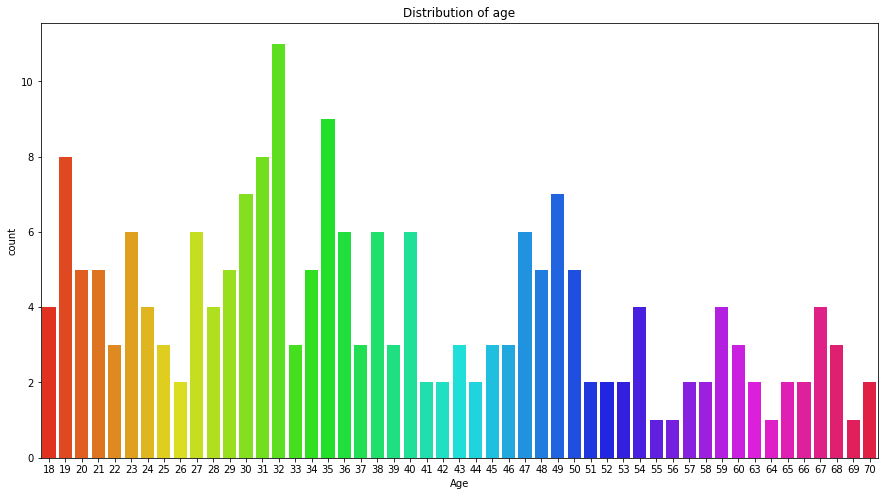

In [243]:
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(data['Age'],palette='hsv')
plt.title("Distribution of age")
plt.show()

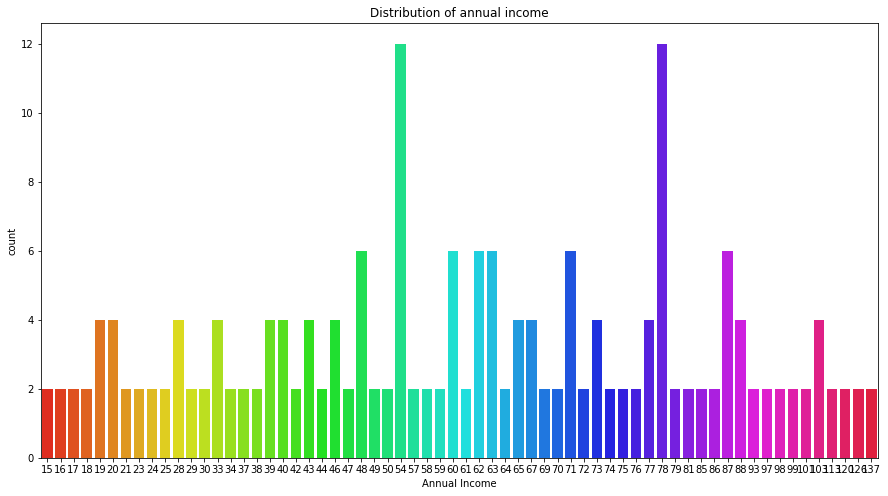

In [244]:
###DISTRIBUTION OF ANNUAL INCOME
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(data['Annual Income'],palette='hsv')
plt.title("Distribution of annual income")
plt.show()

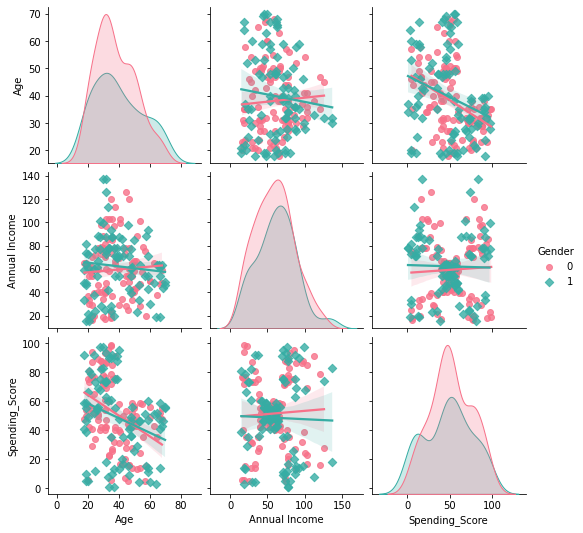

In [245]:
sns.pairplot(data, vars=["Age", "Annual Income", "Spending_Score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

**STATISTIC ANALYSIS**

In [246]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [247]:
data.describe()

,CustomerID,Gender,Age,Annual Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Gender          200 non-null    int64
 2   Age             200 non-null    int64
 3   Annual Income   200 non-null    int64
 4   Spending_Score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [249]:
data['Annual Income'].value_counts().to_frame()

,Annual Income
54,12
78,12
48,6
71,6
63,6
...,...
58,2
59,2
16,2
64,2


**MISSING VALUES**

In [250]:
data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income,Spending_Score


In [251]:
data.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending_Score    0
dtype: int64

**REPLACE THE OUTLIERS**

In [252]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

In [253]:
import matplotlib.pyplot as mtp

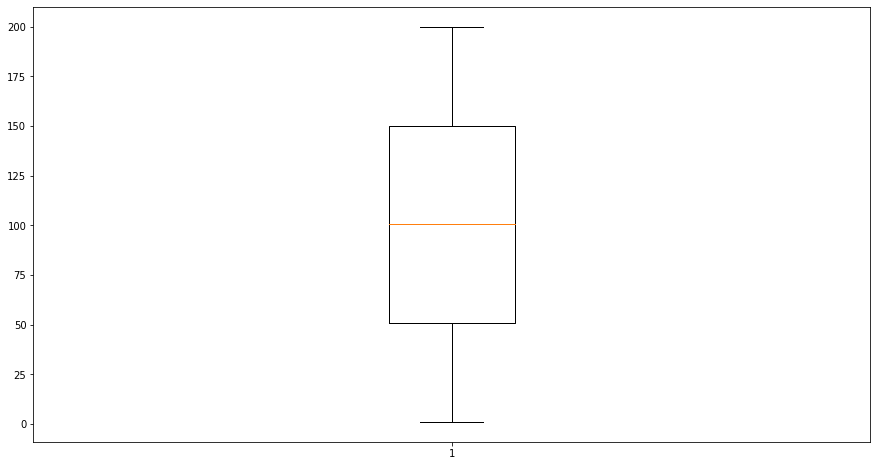

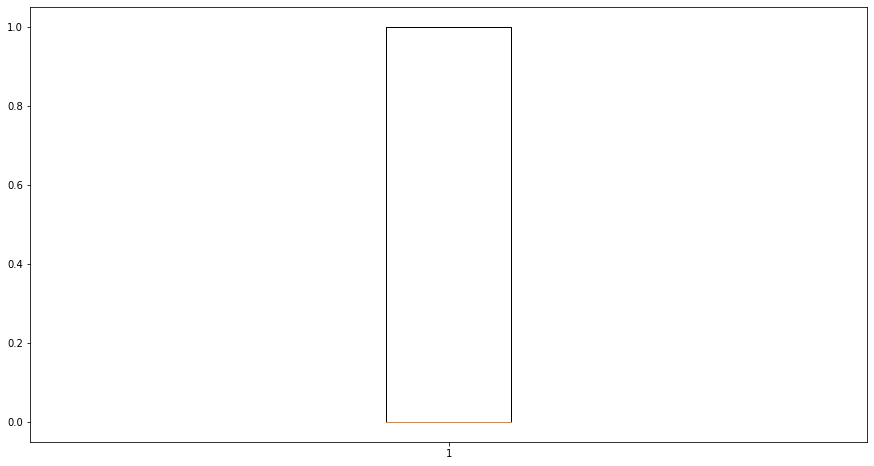

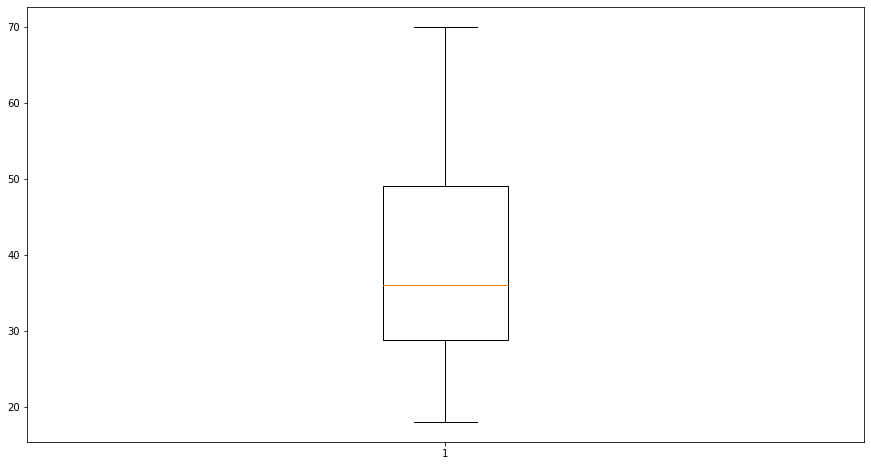

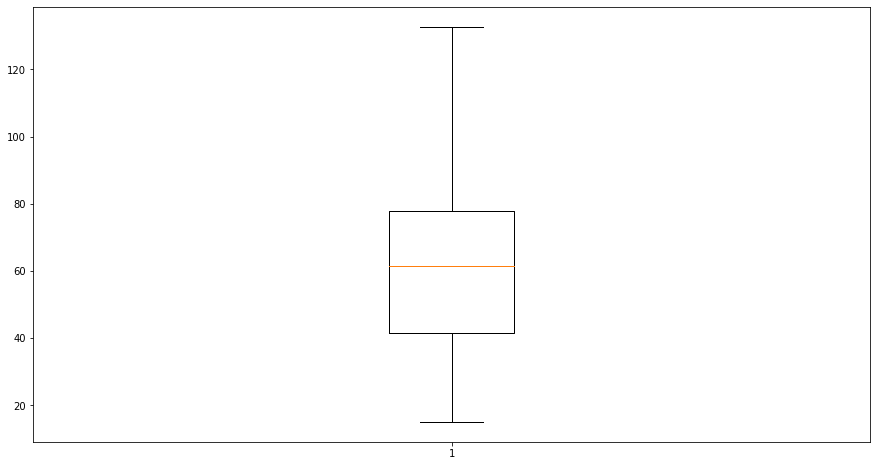

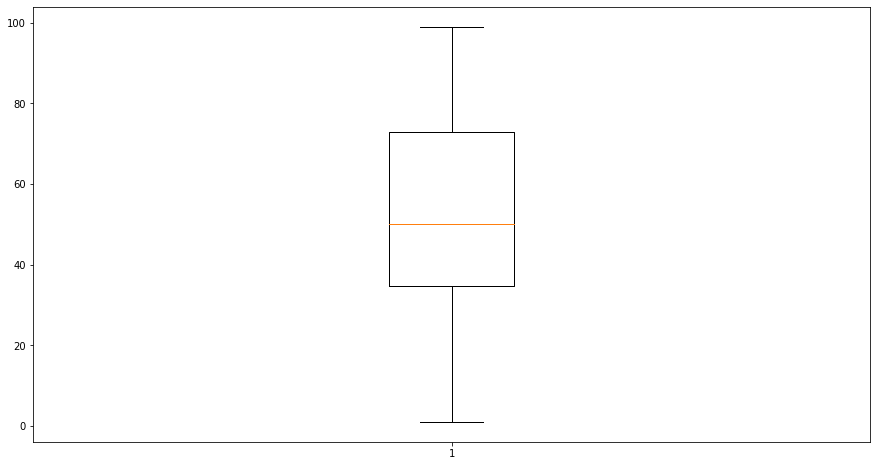

In [254]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        mtp.boxplot(data[i])
        mtp.show()

**ENCODING**

In [255]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending_Score
0,1.0,1.0,19.0,15.0,39.0
1,2.0,1.0,21.0,15.0,81.0
2,3.0,0.0,20.0,16.0,6.0
3,4.0,0.0,23.0,16.0,77.0
4,5.0,0.0,31.0,17.0,40.0


In [256]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Age']=encoder.fit_transform(data['Age'])
data.head()

,CustomerID,Gender,Age,Annual Income,Spending_Score
0,1.0,1.0,1,15.0,39.0
1,2.0,1.0,3,15.0,81.0
2,3.0,0.0,2,16.0,6.0
3,4.0,0.0,5,16.0,77.0
4,5.0,0.0,13,17.0,40.0


In [257]:
x=data.iloc[:,:-1]
x.head()

,CustomerID,Gender,Age,Annual Income
0,1.0,1.0,1,15.0
1,2.0,1.0,3,15.0
2,3.0,0.0,2,16.0
3,4.0,0.0,5,16.0
4,5.0,0.0,13,17.0


**INDEPENDENT VARIABLE SCALING**

In [258]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

**CLUSTER DATA**

In [259]:
from sklearn.cluster import KMeans
X = data.loc[:,["Age", "Annual Income", "Spending_Score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

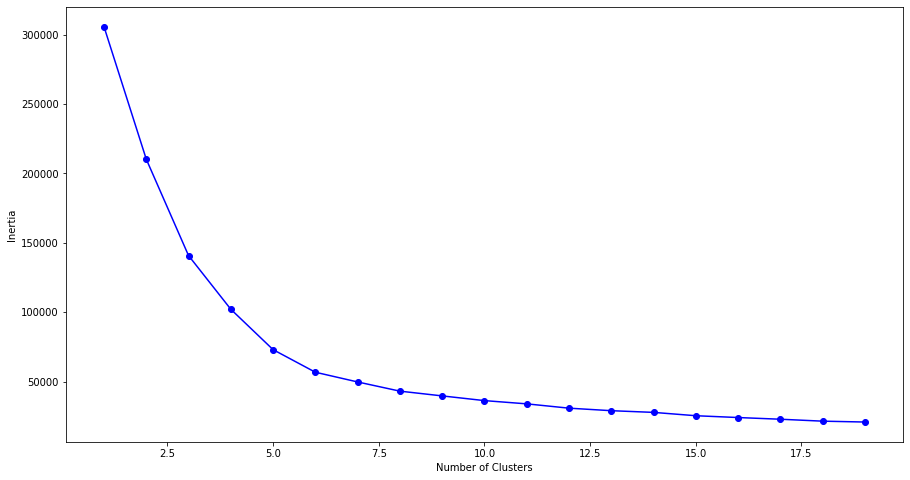

In [260]:
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**CLUSTERING**

In [261]:
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [262]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= X['Spending_Score'],
    y= X['Annual Income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 5,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

**SPLITTING DATA**

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()

x=digits.data
print();print(x.shape)

y=digits.target
print();print(y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

print(); print(x_train.shape)
print(); print(x_test.shape)
print(); print(y_train.shape)
print(); print(y_test.shape)


(1797, 64)

(1797,)

(1203, 64)

(594, 64)

(1203,)

(594,)


**BUILD THE MODEL**

In [265]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

**TRAIN THE MODEL**

In [266]:
reg.fit(x_train,y_train)

RandomForestRegressor()

**TEST THE MODEL**

In [267]:
y_pred=reg.predict(x_test)

**PERFORMANCE MESUREMENT**

In [268]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,y_pred)))

1.1662896937860894
